Output shape: torch.Size([8, 16, 16])
Output values: tensor([[[0.5465, 0.5590, 0.5302,  ..., 0.5459, 0.5459, 0.5246],
         [0.5638, 0.5638, 0.5302,  ..., 0.5590, 0.5357, 0.5302],
         [0.5302, 0.5302, 0.5638,  ..., 0.5590, 0.5411, 0.5545],
         ...,
         [0.5357, 0.5185, 0.5545,  ..., 0.5686, 0.5246, 0.5246],
         [0.5357, 0.5357, 0.5545,  ..., 0.5465, 0.5246, 0.5590],
         [0.5357, 0.5465, 0.5465,  ..., 0.5302, 0.5638, 0.5590]],

        [[0.5246, 0.5590, 0.5302,  ..., 0.5459, 0.5638, 0.5246],
         [0.5638, 0.5459, 0.5302,  ..., 0.5590, 0.5545, 0.5503],
         [0.5302, 0.5302, 0.5638,  ..., 0.5590, 0.5590, 0.5357],
         ...,
         [0.5357, 0.5185, 0.5357,  ..., 0.5686, 0.5465, 0.5246],
         [0.5357, 0.5545, 0.5357,  ..., 0.5246, 0.5246, 0.5411],
         [0.5545, 0.5465, 0.5246,  ..., 0.5503, 0.5638, 0.5590]],

        [[0.5246, 0.5411, 0.5503,  ..., 0.5638, 0.5638, 0.5246],
         [0.5459, 0.5638, 0.5302,  ..., 0.5590, 0.5357, 0.5503],
     

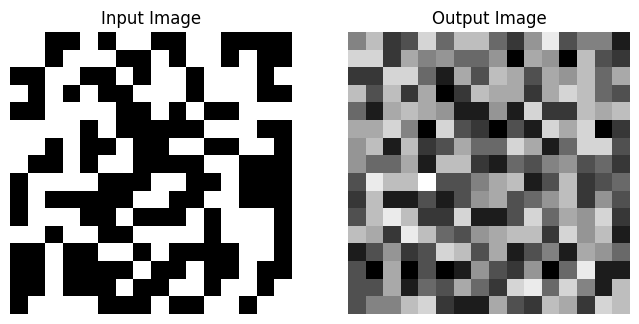

In [1]:
from src.models.toy_vit_module import ToyViT
import torch
import matplotlib.pyplot as plt

# Assuming ToyViT class is already imported

# Define the image dimensions
img_width = 16
img_height = 16

# Create an instance of the ToyViT model
model = ToyViT(img_width=img_width, img_height=img_height)

# Set the model to evaluation mode
model.eval()

# Create a dummy input tensor with a batch size of 8, and random 0 or 1 values
batch_size = 8
input_tensor = torch.randint(0, 2, (batch_size, img_width, img_height)).float()

# Perform a forward pass
with torch.no_grad():
    output = model(input_tensor)

# Check the output shape
print("Output shape:", output.shape)

# Verify that the output values are between 0 and 1
print("Output values:", output)

# Visualize the input and output images for the first instance in the batch
def visualize_input_output(input_img, output_img, idx):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    axs[0].imshow(input_img[idx], cmap='gray')
    axs[0].set_title("Input Image")
    axs[0].axis('off')
    
    axs[1].imshow(output_img[idx], cmap='gray')
    axs[1].set_title("Output Image")
    axs[1].axis('off')
    
    plt.show()

# Convert the output to numpy for visualization
output_np = output.numpy()
input_np = input_tensor.numpy()

# Visualize the first instance
visualize_input_output(input_np, output_np, idx=0)